In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits

In [4]:
import os
homedir=os.getenv("HOME")

In [6]:
file = fits.getdata(homedir+'/Desktop/maskies_ngc3364/NGC3364-custom-image-W3.fits')

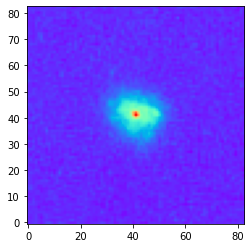

In [40]:
data=plt.imshow(file,origin='lower',cmap='rainbow')

In [41]:
data.set_cmap('viridis')

In [91]:
d={
    "mult":'*',
    "add":'+',
    "subtr":'-'}

In [97]:
eval('5'+d['mult']+'5')

25

In [94]:
eval("5*5")

25

In [605]:
#https://cdsarc.cds.unistra.fr/viz-bin/cat/J/ApJS/245/25#/article

In [420]:
#sorts in ascending order according to one column's entries
re.sort('prefix')

In [596]:
#no psf case; marked galaxies with GALFIT error flags; allWISE (WXSC) vs. unWISE (me)
#can't easily compare radii; WXSC reports SMA. unsure whether SMA is full diameter and if it
#represents the SMA of the effective radius?

#use w3 magnitude instead. 
eff = re['R3']
my_eff = psf_params_v1['re']*2.75/60

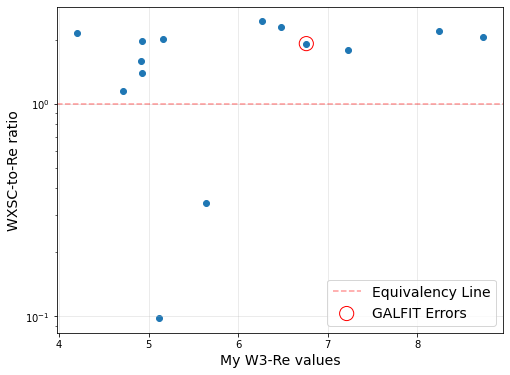

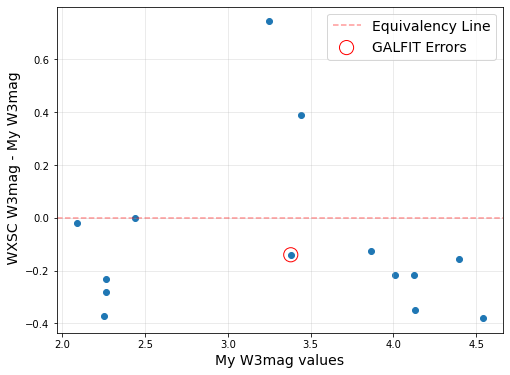

In [603]:
plt.figure(figsize=(8,6))

plt.scatter(eff,eff/my_eff/2)
plt.grid(alpha=0.3)
plt.xlabel('My W3-Re values',fontsize=14)
plt.ylabel('WXSC-to-Re ratio',fontsize=14)
plt.axhline(1,color='r',linestyle='dashed',alpha=0.4, label='Equivalency Line')

err = re_galfit['err_flag']==1
plt.scatter(eff[err],eff[err]/my_eff[err]/2,color='red',s=200,facecolor='None',label='GALFIT Errors')

#plt.ylim(0,40)
plt.yscale('log')
plt.legend(fontsize=14)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(re_galfit['mag'],re['W3mag']-re_galfit['mag'])
plt.grid(alpha=0.3)
plt.xlabel('My W3mag values',fontsize=14)
plt.ylabel(' WXSC W3mag - My W3mag',fontsize=14)
#plt.ylim(0,4)

plt.axhline(0,color='r',linestyle='dashed',alpha=0.4,label='Equivalency Line')

plt.scatter(re_galfit['mag'][err],re['W3mag'][err]-re_galfit['mag'][err],
            color='red',s=200,facecolor='None',label='GALFIT Errors')
plt.legend(fontsize=14)
plt.show()

In [606]:
re

Name,RAJ2000,DEJ2000,Morph,b_a,PA,R1,W1mag,R2,W2mag,R3,W3mag,R4,W4mag,Dist,Beam,W1-W2,W2-W3,LogLw1,LogMs,LognuL3,LognuL4,SFR12,SFR23,sSFR12,RW1,AW1mag,e_AW1mag,RW2,AW2mag,e_AW2mag,RW3,SimbadName,RA_1,DEC_1,objname,NEDname,VFID_V1,prefix,coadd_id
str10,float64,float64,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str10,float64,float64,str7,str12,str8,str20,str8
NGC5907,228.97304,56.32876,SABc,0.19,154.3,6.76,6.47,6.76,6.35,6.76,3.24,6.76,1.57,17.06,496,0.11,3.15,11.16,10.72,9.5,9.33,4.92,3.39,-10.03,7.91,6.46,0.01,8.04,6.34,0.01,8.05,NGC5907,228.9731505,56.3291505,NGC5907,NGC 5907,VFID0937,VFID0936-NGC5907,2293p560
NGC2841,140.51106,50.97655,SBb,0.47,151.4,6.41,5.89,4.93,5.91,4.93,3.78,4.93,2.21,14.08,410,-0.01,2.16,11.22,11.09,9.04,8.91,1.93,1.4,-10.8,7.68,5.88,0.01,6.33,5.89,0.01,4.68,NGC2841,140.511066,50.9766176,NGC2841,NGC 2841,VFID1276,VFID1274-NGC2841,1406p514
NGC4217,183.96248,47.09152,ZZZ,0.17,49.3,5.59,7.23,4.2,7.09,4.2,3.74,4.2,2.07,18.57,540,0.16,3.34,10.93,10.35,9.38,9.2,3.85,2.59,-9.76,6.69,7.21,0.01,5.6,7.05,0.01,5.01,NGC4217,183.9621975,47.0918971,NGC4217,NGC 4217,VFID1556,VFID1554-NGC4217,1832p469
MESSIER63,198.95549,42.02931,Sbc,0.6,103.4,8.73,5.26,8.73,5.2,8.73,1.88,8.73,0.25,9.81,285,0.05,3.35,11.16,10.86,9.56,9.38,5.6,3.75,-10.11,10.36,5.25,0.01,9.94,5.19,0.01,10.17,MESSIER63,198.9553965,42.0292782,NGC5055,MESSIER 063,VFID1932,VFID1930-MESSIER063,1982p424
NGC2683,133.17226,33.42194,Sb,0.19,42.0,7.16,6.14,6.26,6.1,6.26,3.79,6.26,2.65,8.47,246,0.03,2.37,10.7,10.45,8.64,8.29,0.87,0.38,-10.51,8.4,6.13,0.01,7.46,6.08,0.01,7.47,NGC2683,133.172916,33.4225,NGC2683,NGC 2683,VFID2627,VFID2625-NGC2683,1331p333
NGC4725,192.61075,25.50079,SABa,0.63,40.0,6.44,6.09,5.12,6.15,5.12,3.99,5.12,2.62,12.74,371,-0.03,2.2,11.08,10.98,8.91,8.68,1.5,0.86,-10.8,7.67,6.07,0.01,6.46,6.12,0.01,5.22,NGC4725,192.610875,25.50075,NGC4725,NGC 4725,VFID3289,VFID3286-NGC4725,1933p257
NGC2903,143.04214,21.50136,Sbc,0.49,21.5,6.48,5.67,6.48,5.58,6.48,2.07,6.48,0.09,9.98,290,0.08,3.55,11.02,10.64,9.52,9.46,5.07,4.42,-9.94,7.57,5.66,0.01,7.75,5.57,0.01,7.7,NGC2903,143.042052,21.5015656,NGC2903,NGC 2903,VFID3581,VFID3578-NGC2903,1436p212
MESSIER98,183.45123,14.90056,SABb,0.28,155.7,5.64,6.71,5.64,6.67,5.64,3.83,5.64,2.21,15.98,465,0.03,2.91,11.01,10.77,9.2,9.03,2.7,1.82,-10.34,6.62,6.7,0.01,6.69,6.66,0.01,6.77,MESSIER98,183.451428,14.8999705,NGC4192,MESSIER 098,VFID4215,VFID4212-MESSIER098,1831p151
NGC3628,170.07085,13.58912,SBb,0.23,105.1,10.2,5.76,8.24,5.64,8.24,2.44,8.24,0.51,10.45,304,0.12,3.24,11.02,10.53,9.4,9.33,4.05,3.4,-9.93,12.02,5.75,0.01,10.21,5.62,0.01,9.79,NGC3628,170.0707545,13.5896273,NGC3628,NGC 3628,VFID4418,VFID4414-NGC3628,1706p136


In [ ]:
#psf_params_v1 --> website values
#re_galfit --> Rose's values
#re --> WXSC's values

In [564]:
type(3.3) == float

True

In [566]:
grid = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]])

In [569]:
grid

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [570]:
grid[4][1]

22

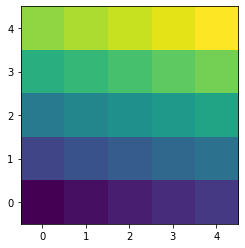

In [573]:
im=plt.imshow(grid,origin='lower')

In [615]:
path_to_dir = homedir+'/Desktop/v2-20220820/'
v2_env = Table.read(path_to_dir+'vf_v2_environment.fits')

In [617]:
v2_env

VFID,DM,SGX,SGY,SGZ,nCI08,nCI08_err,distSGX_Virgo,distSGY_Virgo,distSGZ_Virgo,n5th_2D,n5th_2D_err,n5th,n5th_err,Vcosmic,Vmodel,Vmedian,poor_group_memb,rich_group_memb,pure_field,nearest_filament_dist_2D,nearest_filament_dist_3D,filament,filament_PA,orientation_wrt_filament,filament_member,mem_phase_space,cluster_member,mem_Mould00,sep_degree
bytes8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,float64,float64,bytes40,float64,float64,bool,bool,bool,bool,float64
VFID0000,31.941844830063214,13.145689815736862,11.738032079989287,4.111198355924238,0.09100991167247066,0.02686072613022795,15.409025350662194,1.842051278949052,4.526500946558278,0.7856420753367201,0.3513498172873834,0.07541017414247678,0.03372445511553499,1809.6754122333089,1809.6754122333089,0.0,False,True,False,3.379527299081431,5.217677443566046,Bootes,113.42767598067097,76.57232401932903,False,False,False,False,62.570119372065726
VFID0001,30.824492927707986,7.90894905971585,7.017661982903995,2.284969213716576,0.0461352792838557,0.013616397148532532,10.172284594641182,-2.87831881813624,2.7002718043506153,0.23578532750520065,0.1054464040797359,0.056695964637788275,0.025355206196003763,1081.7584723176835,1722.6764108994216,1081.7584723176835,False,True,False,5.171323556709356,5.232772280613474,Leo_Minor,106.69403584063132,25.545964159368694,False,False,False,False,62.58939048635605
VFID0002,33.08861233285418,24.57232008873139,18.236938715608805,2.303486373551084,0.09538853839762654,0.028153036947034134,26.835655623656724,8.34095791456857,2.7187889641851237,0.9613015495936771,0.4299071223534695,0.17530005643618327,0.07839656853017106,3068.6982545259793,3380.6160975434336,3068.6982545259793,False,False,True,14.782650818489234,14.915240996710157,Bootes,117.24052264173427,27.759477358265727,False,False,False,False,66.58444470534114
VFID0003,32.377721425989066,16.04972421363977,14.3805709158205,4.987924263296796,0.22478546606423896,0.06634333262223746,18.313059748565102,4.484590114780266,5.403226853930836,1.1359651708786418,0.5080190684313615,0.3621526842486207,0.16195960404278664,2211.9535611201745,2211.9535611201745,0.0,False,True,False,5.840428989011135,5.990562912055835,Bootes,113.42767598067097,52.57232401932903,False,False,False,False,62.45929044800913
VFID0004,32.229043216376944,15.062039166171804,13.42946756799603,4.409443857800289,0.5007172431173859,0.14778202163805867,17.325374701097136,3.5334867669557948,4.824746448434329,1.9908993941285014,0.890357276326895,0.5878042339602495,0.26287404491946165,2065.5721196274976,2065.5721196274976,0.0,False,True,False,5.008853600511673,5.504963104498067,Bootes,113.42767598067097,58.24232401932902,False,False,False,False,62.47768115452717
VFID0005,32.36852023075264,16.36887945443161,14.24733084177353,3.77071849313914,0.13802755894500718,0.04073754595640609,18.632214989356942,4.351350040733296,4.18602108377318,0.710316038718794,0.31766298961671924,0.14521501536328987,0.0649421291411985,2202.600664358308,2291.262875707811,2202.600664358308,False,False,True,6.45054229250542,6.615030952002659,Bootes,113.42767598067097,38.25232401932904,False,False,False,False,62.775312807551586
VFID0006,32.87852023075263,23.823428368645985,14.429624490058709,0.4977223192390418,0.15240610288342013,0.04498123901998244,26.086763903571317,4.533643689018474,0.9130249098730814,0.8477993886325675,0.3791474128530367,0.22690642225734137,0.10147563693973731,2785.709119178054,2668.9580301351834,2785.709119178054,False,False,True,13.230324533410682,13.253159491214863,LeoII_B,151.0938249425952,21.03617505740479,False,False,False,False,71.74274616620686
VFID0007,32.79468989279763,23.147324448597697,13.506784603390928,0.35156759342053373,0.19910443878305567,0.05876381707424648,25.41065998352303,3.610803802350693,0.7668701840545733,0.707759758449266,0.31651978632627803,0.2382651684812946,0.106555422678923,2680.215400343395,2680.215400343395,0.0,False,False,True,12.6093

In [643]:
#determine RA, DEC of a pixel in a fits image
from astropy.wcs import WCS

fit = fits.open(homedir+'/Desktop/maskies_ngc3364/NGC3364-custom-image-W3.fits.fz')

In [653]:
#if im is .fits and not .fits.fz, use [0] instead of [1].
w=WCS(fit[1].header)

In [678]:
coord=w.pixel_to_world(40,40)

In [681]:
RA,DEC=w.all_pix2world(40,40,0)

In [684]:
print(RA)

162.1267304652426


In [680]:
coord

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (162.12673047, 72.42417452)>